# Isopod 
### InterStitching Of Pictures based On Descriptors

Example usage of the isopod package.
Start by importing the package and creating a class instance.

In [32]:
#import package
from Isopod import isopod#
import cv2 as cv
import matplotlib.pyplot as plt

#create instance
isp = isopod()

With the instance active, we can now use the class methods to open two images, get their information and match coinciding areas.

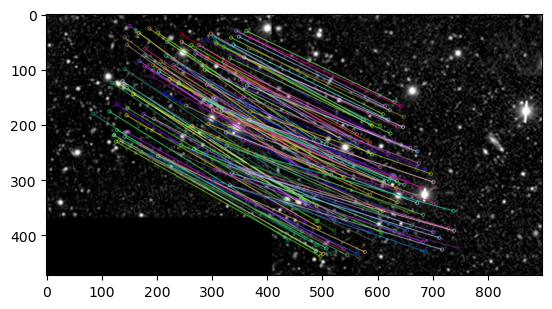

In [33]:
#open the images 
isp.get_image("cut_1.png", "cut_2.png")

#perform the keypoint calculation (i.e. extract image features)
isp.calculate_keypoints()

#match the image features between cut_1.png and cut_2.png. 0.1 is the relative match distance.
isp.match_keypoints(0.1)

#draw the matches onto an image
img = cv.drawMatchesKnn(isp.grayscale_images[0], isp.keypoints[0],
                           isp.grayscale_images[1], isp.keypoints[1],
                           isp.matches, None,
                           flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#display the image
plt.figure()
plt.imshow(img)

After seeing promising matches, we can now transform the images so that they actually fit together. We check again that there are matching keypoints

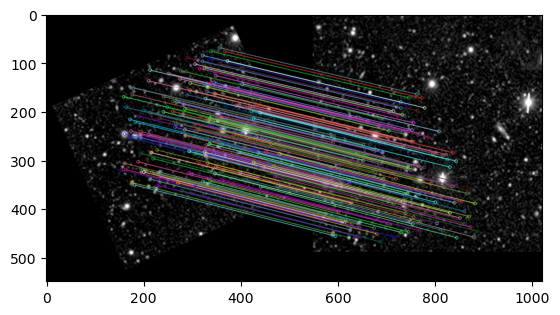

In [34]:
#transform image by resizing and rotating. Each transformation calls the .match_keypoints() method with the given
# relative match distance again (it is good to increase it slightly)
isp.resize_images(0.2)
isp.rotate_images(0.2)

#draw matches 
img2 = cv.drawMatchesKnn(isp.grayscale_images[0], isp.keypoints[0],
                           isp.grayscale_images[1], isp.keypoints[1],
                           isp.matches, None,
                           flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#display the image
plt.figure()
plt.imshow(img2)

Finally, after the images have been transformed and the matches have been found, we can create the stitching (or rather the overlap) and get the final image.

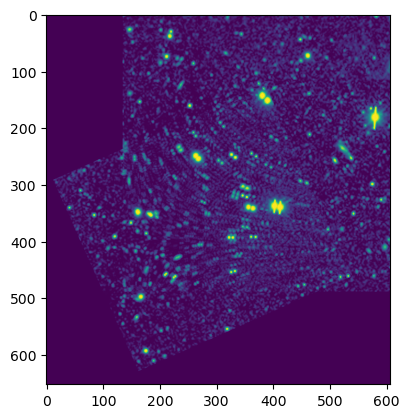

In [35]:
#perform stitching
final_image = isp.stitch_images()

#show final image
plt.figure()
plt.imshow(final_image)